In [69]:
import matplotlib.pyplot as plt
import numpy as np
import intake
from dask.diagnostics import ProgressBar

In [70]:
from cmip6_preprocessing.utils import google_cmip_col
col = google_cmip_col()

In [71]:
col.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,hfls,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,hus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,zg,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,prw,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
511420,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,Amon,sfcWind,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
511421,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,Amon,uas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
511422,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,day,rlut,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
511423,ScenarioMIP,AS-RCEC,TaiESM1,ssp585,r1i1p1f1,day,tasmin,gn,gs://cmip6/CMIP6/ScenarioMIP/AS-RCEC/TaiESM1/s...,NaN,20210721


In [72]:
np.sort(col.df['source_id'].unique())

array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'AWI-ESM-1-1-LR',
       'BCC-CSM2-HR', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0',
       'CAS-ESM2-0', 'CESM1-1-CAM5-CMIP5', 'CESM1-WACCM-SC', 'CESM2',
       'CESM2-FV2', 'CESM2-WACCM', 'CESM2-WACCM-FV2', 'CIESM',
       'CMCC-CM2-HR4', 'CMCC-CM2-SR5', 'CMCC-CM2-VHR4', 'CMCC-ESM2',
       'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'CanESM5',
       'CanESM5-CanOE', 'E3SM-1-0', 'E3SM-1-1', 'E3SM-1-1-ECA',
       'EC-Earth3', 'EC-Earth3-AerChem', 'EC-Earth3-CC', 'EC-Earth3-LR',
       'EC-Earth3-Veg', 'EC-Earth3-Veg-LR', 'EC-Earth3P', 'EC-Earth3P-HR',
       'EC-Earth3P-VHR', 'ECMWF-IFS-HR', 'ECMWF-IFS-LR', 'FGOALS-f3-H',
       'FGOALS-f3-L', 'FGOALS-g3', 'FIO-ESM-2-0', 'GFDL-AM4', 'GFDL-CM4',
       'GFDL-CM4C192', 'GFDL-ESM2M', 'GFDL-ESM4', 'GFDL-OM4p5B',
       'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'GISS-E2-1-H', 'GISS-E2-2-G',
       'HadGEM3-GC31-HM', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-LM',
       'HadGEM3-GC31-MM', 'IITM-ESM', 'I

In [73]:
models = 'GFDL-ESM4'#, 'GFDLCM4', 'HadGEM3-GC31-HM']

In [74]:
cat = col.search(
    variable_id = ['eminox', 'o3loss'], 
    source_id = models, 
    experiment_id = 'historical',
    grid_label = 'gr1', 
    table_id = 'AERmon', 
    member_id = 'r1i1p1f1'
)

ddict = cat.to_dataset_dict(
    zarr_kwargs={'consolidated':True, 'use_cftime':True}, # recommended for faster reading and better time handling
    storage_options={'token': 'anon'}, # needed to access the public CMIP6 data on google
    aggregate=False,
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


In [75]:
ds_a = ddict['CMIP.CCCma.GFDL-ESM4.historical.r1i1p1f1.AERmon.eminox.gr1.gs://cmip6/CMIP6/CMIP/CCCma/GFDL-ESM4/historical/r1i1p1f1/AERmon/eminox/gr1/v20190429/.nan.20190429']
ds_a

KeyError: 'CMIP.CCCma.GFDL-ESM4.historical.r1i1p1f1.AERmon.eminox.gr1.gs://cmip6/CMIP6/CMIP/CCCma/GFDL-ESM4/historical/r1i1p1f1/AERmon/eminox/gr1/v20190429/.nan.20190429'

In [77]:
np.sort(cat.df['member_id'].unique())

array(['r1i1p1f1'], dtype=object)

In [78]:
ds_a = ddict['CMIP.NOAA-GFDL.GFDL-ESM4.historical.r1i1p1f1.AERmon.eminox.gr1.gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/AERmon/eminox/gr1/v20190726/.nan.20190726']
ds_a

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 1980, lat: 180, lon: 288)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Data variables:
    eminox     (time, lat, lon) float32 dask.array<chunksize=(317, 180, 288), meta=np.ndarray>
Attributes: (12/51)
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   36500.0
    comment:                 <null ref>
    ...                      ...
    variant_info:            N/A
    variant_label:           r1i1p1f1
    netcdf_tracking_ids:     hdl:21.14100/6b2e867e-5b50-4632-b37d-094a0f96044...
    version_id:              v20190726
    intake_esm_varname:      None
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-ESM4.historical.r1i1p1f1.AER...

In [ ]:
ds_b = ddict['CMIP.NOAA-GFDL.GFDL-ESM4.historical.r1i1p1f1.AERmon.o3loss.gr1.gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/AERmon/o3loss/gr1/v20190726/.nan.20190726']
ds_b = ds_b.sel(lev = 0, method = 'nearest')
ds_b

In [76]:
ds_b.time

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
    lev      float64 1.849e-05
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    calendar_type:  noleap
    description:    Temporal mean
    long_name:      time
    standard_name:  time

In [96]:
from cmip6_preprocessing.preprocessing import combined_preprocessing
print(combined_preprocessing(ds_a).dims)
print(combined_preprocessing(ds_b).dims)

Frozen({'time': 1980, 'y': 180, 'x': 288, 'bnds': 2, 'vertex': 4})
Frozen({'bnds': 2, 'y': 180, 'x': 288, 'time': 1980, 'vertex': 4})


/srv/conda/lib/python3.9/site-packages/cmip6_preprocessing/preprocessing.py:233: UserWarning: CMIP.NOAA-GFDL.GFDL-ESM4.historical.r1i1p1f1.AERmon.gr1.none: Unit correction failed with: Cannot convert variables:
    incompatible units for variable 'lev': Cannot convert from 'dimensionless' (dimensionless) to 'meter' ([length])
  warnings.warn(


In [27]:
ddict = cat.to_dataset_dict(
    zarr_kwargs = {'consolidated': True, 'use_cftime': True},
    storage_options = {'token': 'anon'}, # needed to access the public CMIP6 data on google
    aggregate = False,
    preprocess = combined_preprocessing, # this applies the preprocessing to all datasets
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


/srv/conda/lib/python3.9/site-packages/cmip6_preprocessing/preprocessing.py:233: UserWarning: CMIP.NOAA-GFDL.GFDL-ESM4.historical.r1i1p1f1.AERmon.gr1.none: Unit correction failed with: Cannot convert variables:
    incompatible units for variable 'lev': Cannot convert from 'dimensionless' (dimensionless) to 'meter' ([length])
  warnings.warn(


In [38]:
ddict

{'CMIP.NOAA-GFDL.GFDL-ESM4.historical.r1i1p1f1.AERmon.eminox.gr1.gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/AERmon/eminox/gr1/v20190726/.nan.20190726': <xarray.Dataset>
 Dimensions:        (time: 1980, y: 180, x: 288, bnds: 2, vertex: 4)
 Coordinates:
   * y              (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
   * x              (x) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
   * time           (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
     lat_bounds     (y, bnds, x) float64 dask.array<chunksize=(180, 2, 288), meta=np.ndarray>
     lon_bounds     (x, bnds, y) float64 dask.array<chunksize=(288, 2, 180), meta=np.ndarray>
     time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
     lon            (x, y) float64 0.625 0.625 0.625 0.625 ... 359.4 359.4 359.4
     lat            (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
     lon_verticies  (vertex, x, y) float64 dask.array<chu

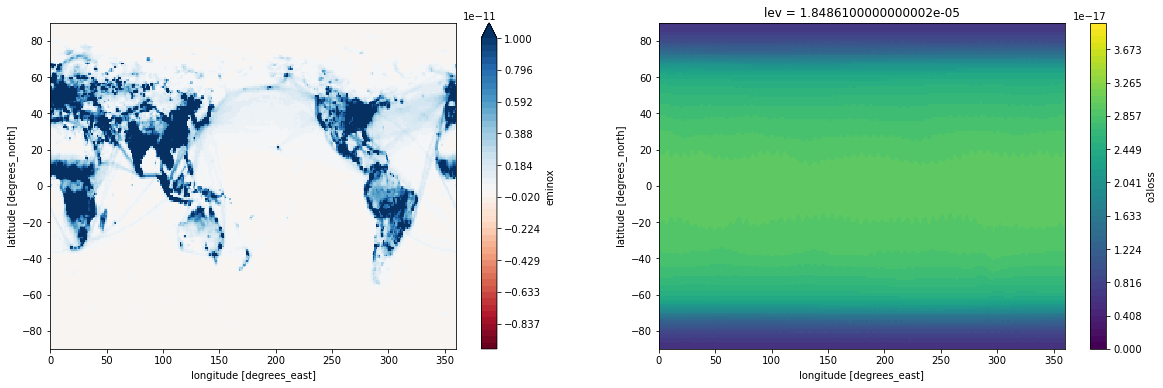

In [81]:
fig, axes = plt.subplots(ncols = 2, figsize = (20, 6))

ds_a['eminox'].sel(time = slice('2010-01-01', '2015-12-31')).mean('time').plot(ax = axes[0], cmap = 'RdBu', levels = np.linspace(-1e-11, 1e-11))
ds_b['o3loss'].sel(time = slice('2010-01-01', '2015-12-31')).mean('time').plot(ax = axes[1], levels = np.linspace(0, 4e-17))

## Grouping Datasets

In [82]:
from cmip6_preprocessing.postprocessing import merge_variables, concat_members, concat_experiments

ddict_combined = concat_members(concat_experiments(merge_variables(ddict)))

/srv/conda/lib/python3.9/site-packages/cmip6_preprocessing/postprocessing.py:113: UserWarning: Match attributes ['variable_id'] not found in any of the datasets.         This can happen when several combination functions are used.
  warnings.warn(


In [83]:
ddict_combined.keys()

dict_keys(['GFDL-ESM4.gr1.historical.AERmon'])

In [ ]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=[14,4])
for ax, (name, ds) in zip(axarr.flat, ddict_combined.items()):
    # show just the first time step
    ds = ds.isel(time=0)
    
    # mask out the surface nitrate where the SST is above 25 deg
    da = ds.no3os.where(ds.tos>=25)
    
    # average all members
    if 'member_id' in da.dims:
        da = da.mean('member_id')
    da.plot(ax=ax, robust=True)
    ax.set_title(name)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

/srv/conda/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


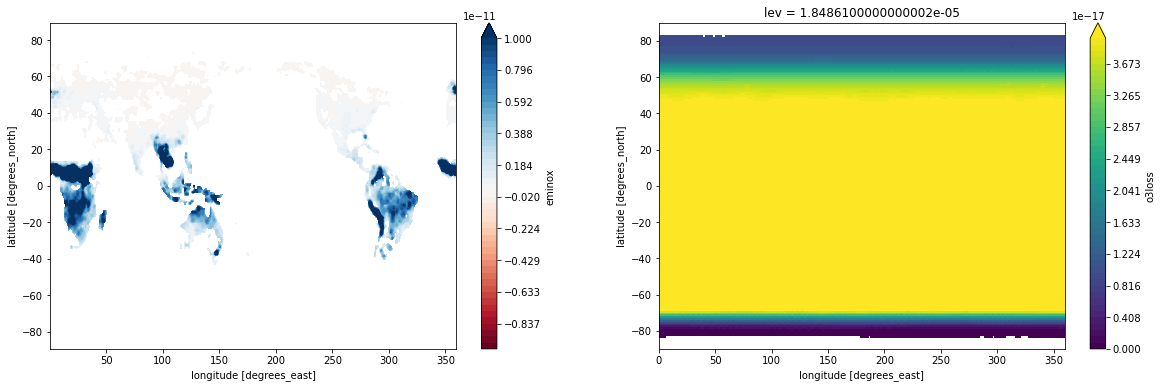

In [89]:
fig, axes = plt.subplots(ncols = 2, figsize = (20, 6))

ds_a.isel(time = 0).eminox.where(ds_a.eminox >= 1e-11).mean('time').plot.contourf(ax = axes[0], cmap = 'RdBu', levels = np.linspace(-1e-11, 1e-11))
ds_b.isel(time = 100).o3loss.where(ds_b.o3loss >=2e-17).mean('time').plot(ax = axes[1], levels = np.linspace(0, 4e-17))

## Masking ocean basins

In [87]:
import regionmask
from cmip6_preprocessing.regionmask import merged_mask
# load ocean basin data
basins = regionmask.defined_regions.natural_earth.ocean_basins_50

/srv/conda/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_geography_marine_polys.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


In [88]:
basins

<regionmask.Regions>
Name:     Natural Earth: ocean basins 50m
Source:   http://www.naturalearthdata.com

Regions:
  0         Arctic Ocean         Arctic Ocean
  1       SOUTHERN OCEAN       SOUTHERN OCEAN
  2 North Atlantic Ocean North Atlantic Ocean
  3  North Pacific Ocean  North Pacific Ocean
  4  South Pacific Ocean  South Pacific Ocean
 ..                  ...                  ...
114           Ungava Bay           Ungava Bay
115   Great Barrier Reef   Great Barrier Reef
116         Amazon River         Amazon River
117        Yangtze River        Yangtze River
118       Columbia River       Columbia River

[119 regions]

## Aggregating masked data to form a time-series

[########################################] | 100% Completed |  2.6s
[########################################] | 100% Completed |  1min 36.7s


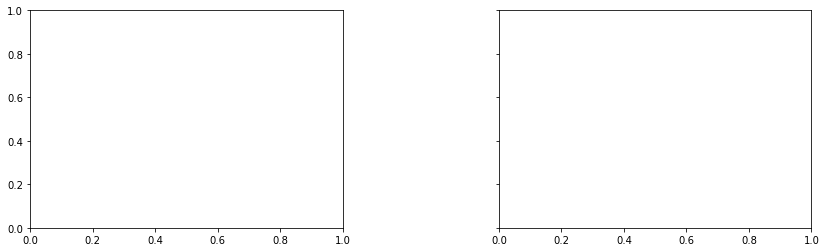

In [99]:
time_window = 36 # for monthly data here this is a 3 year window

fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=[14,4], sharey=True)
da = ds_a.eminox
        
# mask out the indian ocean
mask = merged_mask(basins, da)

da_masked = da.where(mask == 5)

da_timeseries = da_masked.mean(['lat', 'lon'])
# this is now a heavy computation, using the full dataset!
with ProgressBar():
    da_timeseries = da_timeseries.load()

da_timeseries = da_timeseries.coarsen(time=time_window, boundary='trim').mean() # average in 3 year intervals to supress short term variability


da_timeseries.plot(ax=ax, hue='member_id', color='C0', add_legend=False)
ax.set_title(name)

fig.subplots_adjust(hspace=0.5, wspace=0.5)
  
da = ds_b.o3loss

# mask out the indian ocean
mask = merged_mask(basins, da)

da_masked = da.where(mask == 5)

da_timeseries = da_masked.mean(['y', 'x'])
# this is now a heavy computation, using the full dataset!
with ProgressBar():
    da_timeseries = da_timeseries.load()

da_timeseries = da_timeseries.coarsen(time=time_window, boundary='trim').mean() # average in 3 year intervals to supress short term variability


da_timeseries.plot(ax=ax, hue='member_id', color='C0', add_legend=False)
ax.set_title(name)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

## Handling model metrics with cmip6_preprocessing